In [1]:
from google.colab import drive
!pip install duckdb==0.5.1
import duckdb
import pandas as pd
import os
from sklearn import metrics 
!pip install pickle-mixin
import pickle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 60.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6006 sha256=a9081af5bd482d96f02c0a279503310de249558d9f23f8bebc8c13b097ad32fc
  Stored in directory: /root/.cache/pip/wheels/2a/a4/6c/83bfbc3b94f1bb43d634b07a6a893fd437a45c58b29aea5142
Successfully built pickle-mixin


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
conn = duckdb.connect("/content/drive/MyDrive/ADSDB BASES DE DATOS/copy_DB_Train&Test",read_only=False)
existingTables=conn.execute("SHOW TABLES").fetchall()
existingTables

[('test_data',), ('train_data',)]

In [ ]:

test=conn.execute("SELECT * from test_data").fetchdf()
train=conn.execute("SELECT * from train_data").fetchdf()

In [ ]:
test.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,status
0,-0.458702,-0.264809,-0.561279,-0.288953,0.046279,-0.316180,0.120233,-0.215104,-0.035799,0.415494,0.189290,0.119608,-0.052343,-0.083709,0.158743,operating
1,-0.410565,-0.379414,-0.197826,-0.657564,0.542467,-0.233638,0.132681,-0.212070,0.100631,0.109712,0.301371,0.076147,0.504562,-0.161911,-0.291482,acquired
2,-0.635205,-0.627188,1.438039,2.530802,-0.798011,1.647070,-0.448477,0.215573,-0.311649,-0.337728,0.997827,-0.681934,-0.792498,0.433586,0.352756,operating
3,25.258541,-3.769855,-0.975907,2.532925,1.922455,-6.611909,0.784044,7.522407,-0.183415,3.864264,-3.559313,1.648731,-4.796785,-0.074723,6.728114,closed
4,-0.875201,-0.260021,-0.153905,-0.366178,-0.480997,-0.045923,0.031716,-0.153191,0.155702,-0.072064,-0.102595,-0.360228,0.283457,-0.192729,0.017385,operating


In [ ]:
X_test = test.iloc[:, test.columns!="status"]
y_test = test.status

X_train = train.iloc[:, train.columns!="status"]
y_train = train.status

In [ ]:
X_test.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
0,-0.458702,-0.264809,-0.561279,-0.288953,0.046279,-0.316180,0.120233,-0.215104,-0.035799,0.415494,0.189290,0.119608,-0.052343,-0.083709,0.158743
1,-0.410565,-0.379414,-0.197826,-0.657564,0.542467,-0.233638,0.132681,-0.212070,0.100631,0.109712,0.301371,0.076147,0.504562,-0.161911,-0.291482
2,-0.635205,-0.627188,1.438039,2.530802,-0.798011,1.647070,-0.448477,0.215573,-0.311649,-0.337728,0.997827,-0.681934,-0.792498,0.433586,0.352756
3,25.258541,-3.769855,-0.975907,2.532925,1.922455,-6.611909,0.784044,7.522407,-0.183415,3.864264,-3.559313,1.648731,-4.796785,-0.074723,6.728114
4,-0.875201,-0.260021,-0.153905,-0.366178,-0.480997,-0.045923,0.031716,-0.153191,0.155702,-0.072064,-0.102595,-0.360228,0.283457,-0.192729,0.017385


In [ ]:
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler



In [ ]:
clf = pickle.load(open('/content/drive/MyDrive/ADSDB BASES DE DATOS/model.pkl', 'rb'))


In [ ]:
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),4))

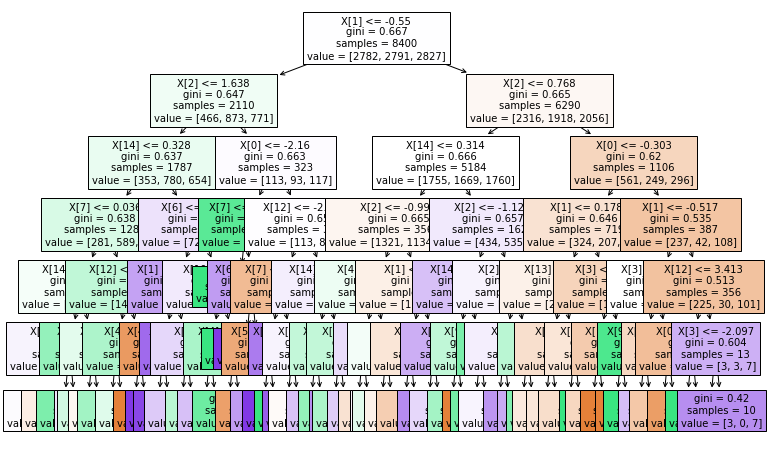

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=6)
clf = clf.fit(X_train,y_train)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show()

In [ ]:
conn.close() 